<a href="https://colab.research.google.com/github/Yasmine-edl/Machine-learning-FOAD/blob/main/AbandonScolaire_Elidrissi_Yasmine_Soumaya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Age  Sexe  Taux_presence  Nombre_retards  Note_moyenne  \
0   21     0      89.585023               2     15.826896   
1   20     1      70.713068               3     12.829358   
2   22     0      82.122963               1     13.086319   
3   24     1      87.408859               3     14.992032   
4   20     1      86.470676               3     12.671649   

   Situation_familiale  Abandon  
0                    2        0  
1                    0        0  
2                    2        0  
3                    0        0  
4                    3        0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  2000 non-null   int64  
 1   Sexe                 2000 non-null   int64  
 2   Taux_presence        2000 non-null   float64
 3   Nombre_retards       2000 non-null   int64  
 4   Note_moyenne      

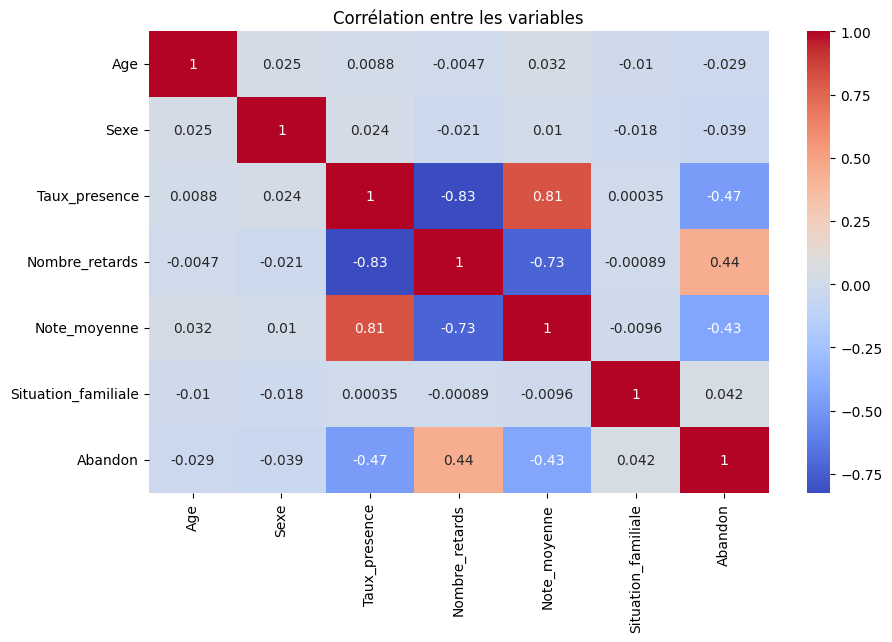

<ipython-input-16-5327ad8e4db3>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cor_target.values, y=cor_target.index, palette="magma")


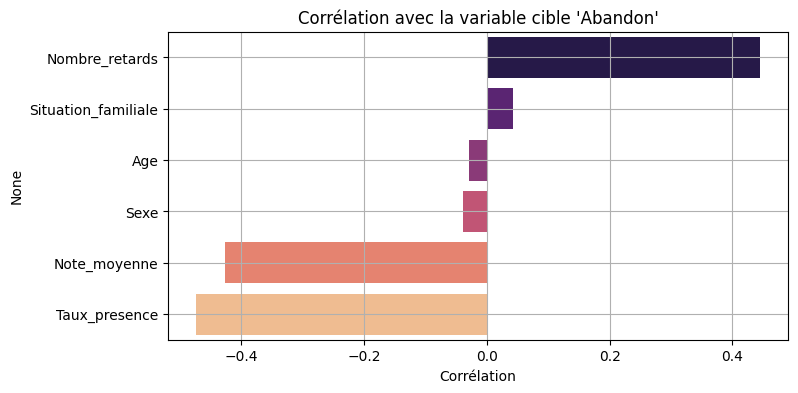

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc


DataFrame = pd.read_csv("Dataset_Abandon_Scolaire.csv")

print(df.head())
print(df.info())

le_sexe = LabelEncoder()
le_famille = LabelEncoder()
df["Sexe"] = le_sexe.fit_transform(df["Sexe"])
df["Situation_familiale"] = le_famille.fit_transform(df["Situation_familiale"])

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Corrélation entre les variables")
plt.show()

cor_target = df.corr()["Abandon"].drop("Abandon").sort_values(ascending=False)
plt.figure(figsize=(8, 4))
sns.barplot(x=cor_target.values, y=cor_target.index, palette="magma")
plt.title("Corrélation avec la variable cible 'Abandon'")
plt.xlabel("Corrélation")
plt.grid(True)
plt.show()

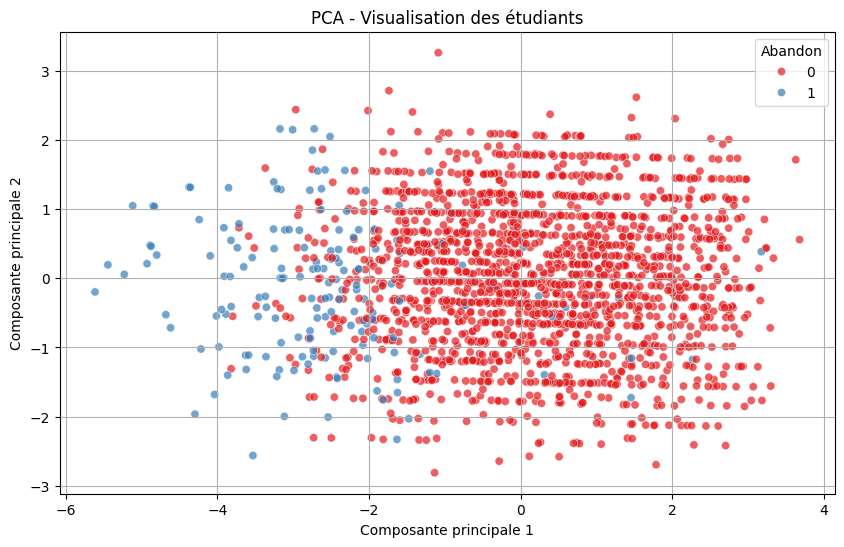

Composante 1 : 42.96%
Composante 2 : 17.25%


In [17]:
X = df.drop("Abandon", axis=1)
y = df["Abandon"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=["Composante 1", "Composante 2"])
pca_df["Abandon"] = y.values

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x="Composante 1", y="Composante 2", hue="Abandon", palette="Set1", alpha=0.7)
plt.title("PCA - Visualisation des étudiants")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.grid(True)
plt.legend(title="Abandon")
plt.show()

explained = pca.explained_variance_ratio_
print(f"Composante 1 : {explained[0]*100:.2f}%")
print(f"Composante 2 : {explained[1]*100:.2f}%")


=== Modèle : Régression Logistique ===
Matrice de confusion :
[[357   9]
 [ 15  19]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       366
           1       0.68      0.56      0.61        34

    accuracy                           0.94       400
   macro avg       0.82      0.77      0.79       400
weighted avg       0.94      0.94      0.94       400



<ipython-input-15-a4f980ea9dce>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coeffs, x="Coefficient", y="Feature", palette="viridis")


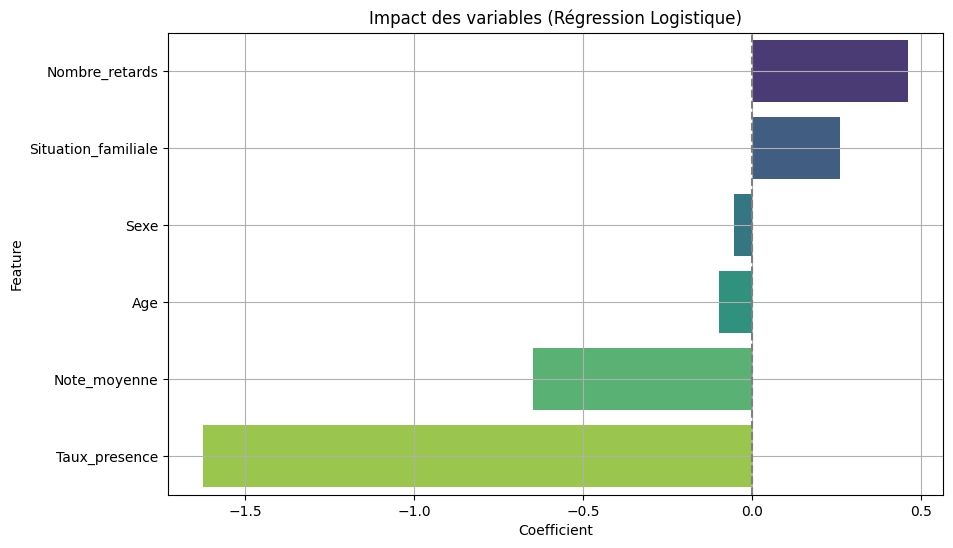


Interprétation des coefficients :
               Feature  Coefficient
3       Nombre_retards     0.461307
5  Situation_familiale     0.260068
1                 Sexe    -0.052661
0                  Age    -0.097032
4         Note_moyenne    -0.647411
2        Taux_presence    -1.624028


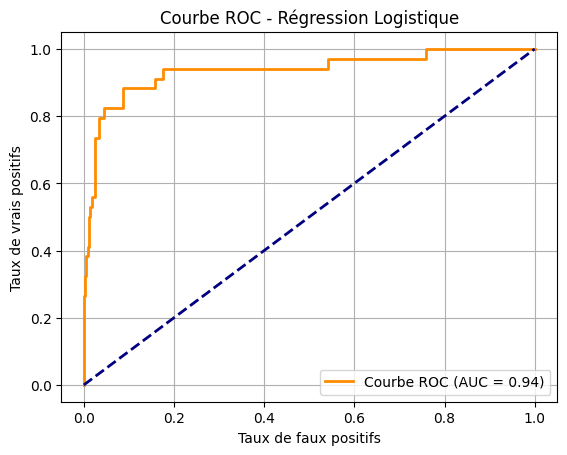


=== Modèle : Arbre de Décision ===
Matrice de confusion :
[[347  19]
 [  9  25]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       366
           1       0.57      0.74      0.64        34

    accuracy                           0.93       400
   macro avg       0.77      0.84      0.80       400
weighted avg       0.94      0.93      0.93       400



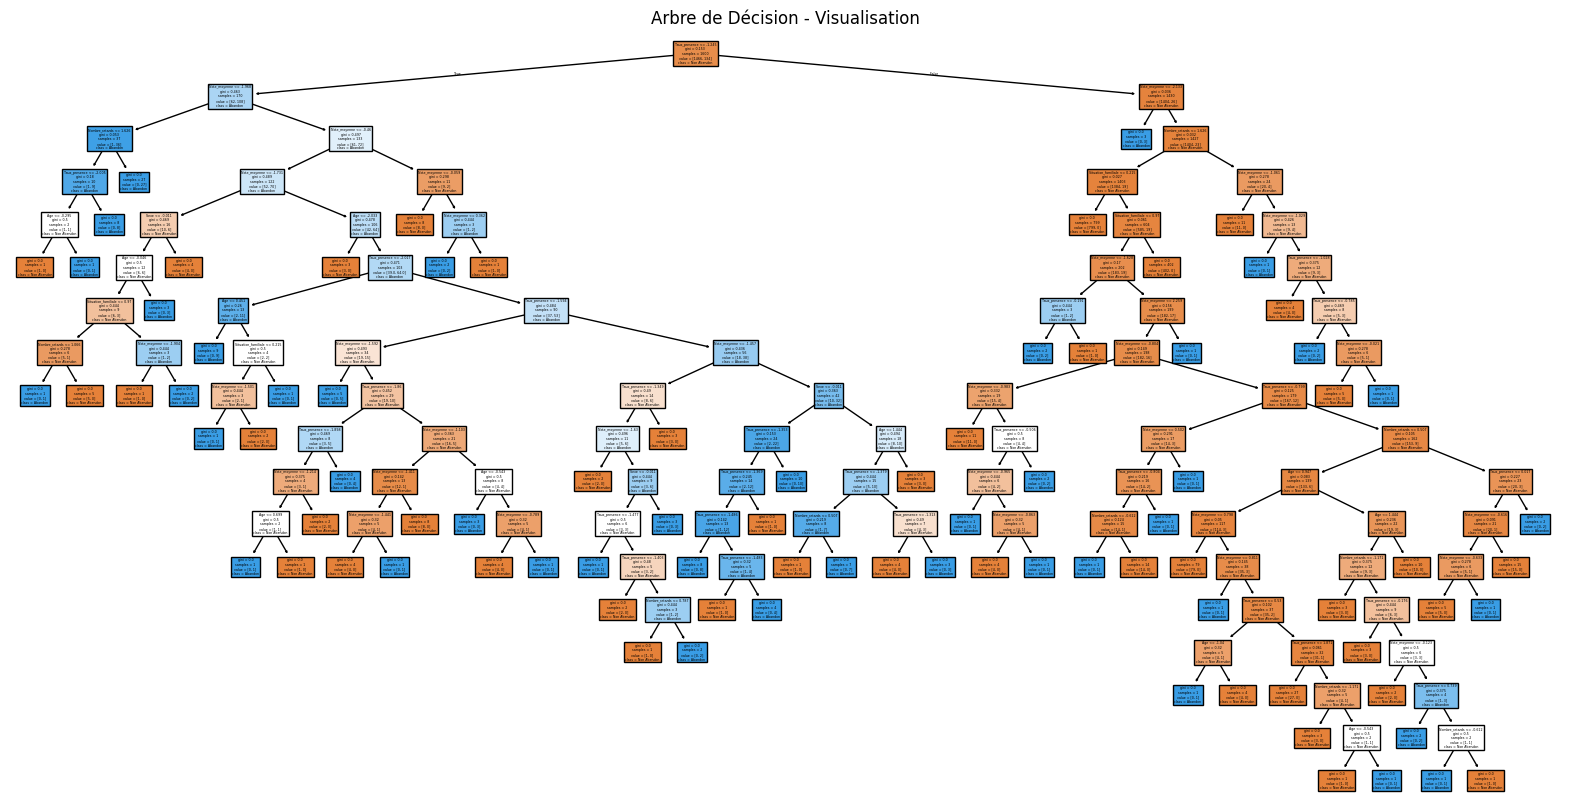

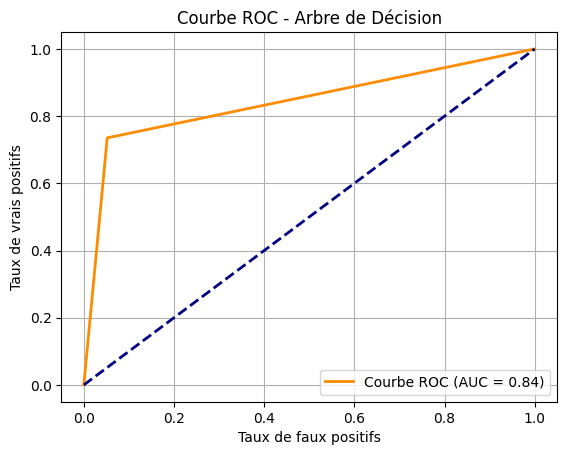


=== Modèle : KNN ===
Matrice de confusion :
[[360   6]
 [ 17  17]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       366
           1       0.74      0.50      0.60        34

    accuracy                           0.94       400
   macro avg       0.85      0.74      0.78       400
weighted avg       0.94      0.94      0.94       400



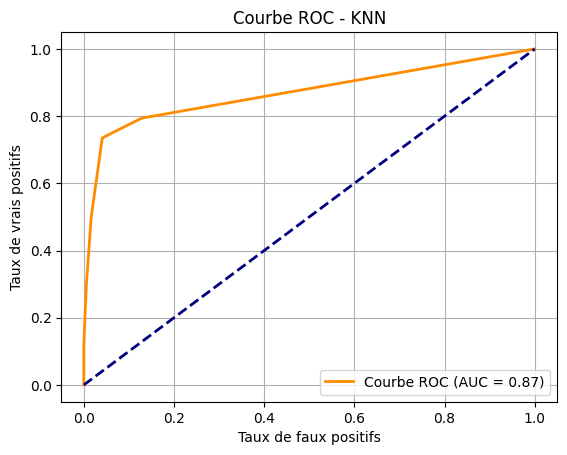

In [15]:
for name, model in models.items():
    print(f"\n=== Modèle : {name} ===")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Matrice de confusion :")
    print(confusion_matrix(y_test, y_pred))

    print("\nRapport de classification :")
    print(classification_report(y_test, y_pred))

    if name == "Arbre de Décision":
        plt.figure(figsize=(20, 10))
        plot_tree(model, feature_names=X.columns, class_names=["Non Abandon", "Abandon"], filled=True)
        plt.title("Arbre de Décision - Visualisation")
        plt.show()

    if name == "Régression Logistique":
        coeffs = pd.DataFrame({
            'Feature': X.columns,
            'Coefficient': model.coef_[0]
        }).sort_values(by='Coefficient', ascending=False)

        plt.figure(figsize=(10, 6))
        sns.barplot(data=coeffs, x="Coefficient", y="Feature", palette="viridis")
        plt.title("Impact des variables (Régression Logistique)")
        plt.axvline(x=0, color='gray', linestyle='--')
        plt.grid(True)
        plt.show()

        print("\nInterprétation des coefficients :")
        print(coeffs)

    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('Taux de faux positifs')
    plt.ylabel('Taux de vrais positifs')
    plt.title(f'Courbe ROC - {name}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()